# Notebook to test and evaluate the libary on Binary Classification problems

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import skprofiling

import pandas as pd
import pandas_profiling
from sklearn.linear_model import LogisticRegression

## Load Data

In [3]:
df = pd.read_csv("../examples/data/titanic/train.csv")

In [5]:
df.profile_report()

In [7]:
# Shuffle dataframe
df = df.sample(frac=1)

n_instances = df.shape[0]
train_size = int(n_instances * 0.8)

df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
671,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
814,815,0,3,"Tomlin, Mr. Ernest Portage",male,30.5,0,0,364499,8.0500,NaN,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S
870,871,0,3,"Balkic, Mr. Cerin",male,26.0,0,0,349248,7.8958,NaN,S


In [9]:
df_train_processed = (
    pd.get_dummies(df_train.drop(["Survived", "Name", "Ticket", "PassengerId", "Cabin"], axis=1))
    .fillna(-1)
)

df_train_processed.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
671,1,31.0,1,0,52.0000,0,1,0,0,1
224,1,38.0,1,0,90.0000,0,1,0,0,1
814,3,30.5,0,0,8.0500,0,1,0,0,1
486,1,35.0,1,0,90.0000,1,0,0,0,1
870,3,26.0,0,0,7.8958,0,1,0,0,1


In [10]:
df_test_processed = (
    pd.get_dummies(df_test.drop(["Survived", "Name", "Ticket", "PassengerId", "Cabin"], axis=1))
    .fillna(-1)
)

df_test_processed.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
639,3,-1.0,1,0,16.1000,0,1,0,0,1
783,3,-1.0,1,2,23.4500,0,1,0,0,1
291,1,19.0,1,0,91.0792,1,0,1,0,0
100,3,28.0,0,0,7.8958,1,0,0,0,1
316,2,24.0,1,0,26.0000,1,0,0,0,1


---

## Create Model

In [11]:
clf = LogisticRegression().fit(df_train_processed, df_train["Survived"])

In [12]:
y_true = df_test["Survived"].values
y_pred = clf.predict_proba(df_test_processed)[:, 1]

---

# Statistical Metrics

These are statistical metrics that show some quality of the model.

Since some of the metrics are threshold dependent, here is displayed the best value found by varying the threshold.

<br>

,Best Value,Best Threshold
Area Under ROC Curve*,0.860138,NaN
F1-Score,0.771429,0.31
Accuracy,0.821229,0.31
Average Precision-Recall*,0.857933,NaN
Jaccard Score,0.627907,0.31
Humming Loss,0.821229,0.31


<br>

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       107
           1       0.82      0.65      0.73        72

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



<br>

\* These metrics do not depend on the threshold.

---

# Plots

The plots shown here are meant to give insights about the distributions of the model

## Score Distribution

This plot should give some clarity about how is the score distributed for each class.

Usually, the more separated are the scores, the best the model is.

Areas with high overlap represent non-confidant decisions.

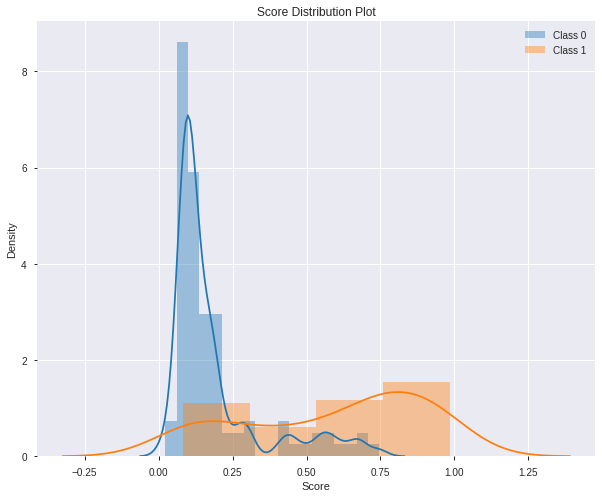

## ROC Curve

This curve indicates how many false positive one should expect before encountering a true positive.

Usually, the bigger the area under the ROC curve, the better the model is predicting the targetclass. 

A random model would have a straight line plot.

Also, the shape of the curve indicates if the model is making more mistakes on false positivesor false negatives.

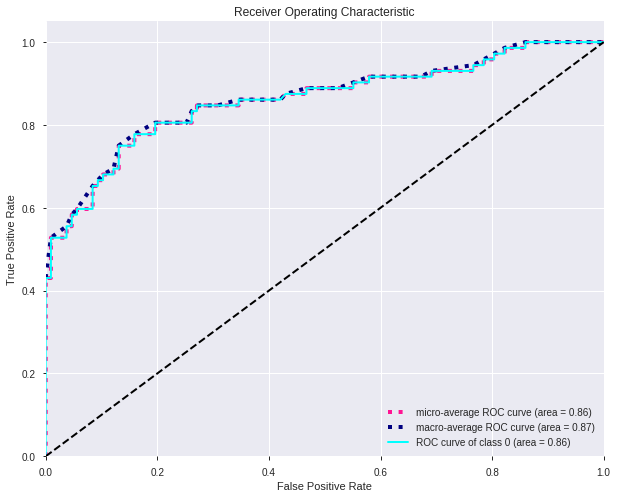

## PR Curve

This plot shows the trade-off between precision and recall for different thresholds.

The bigger the area under the PR curve, the better the model is predicting the targetclass. 

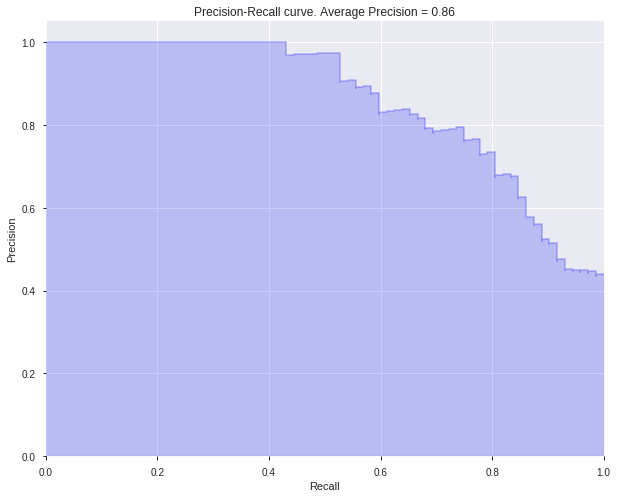

## Threshold Impact

This plot shows how the threshold impacts the model's performance

It indicates regions of threshold where the model is better separating the classes.

It should be useful when one is considering a sub-optimum threshold to meet some systemrequirement.

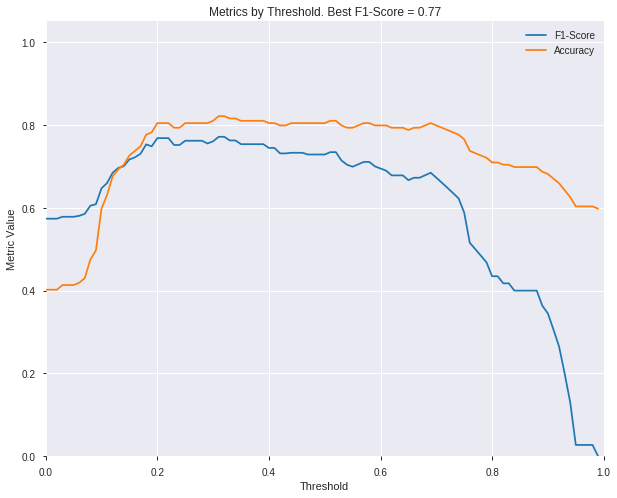

## Probability Calibration Curve

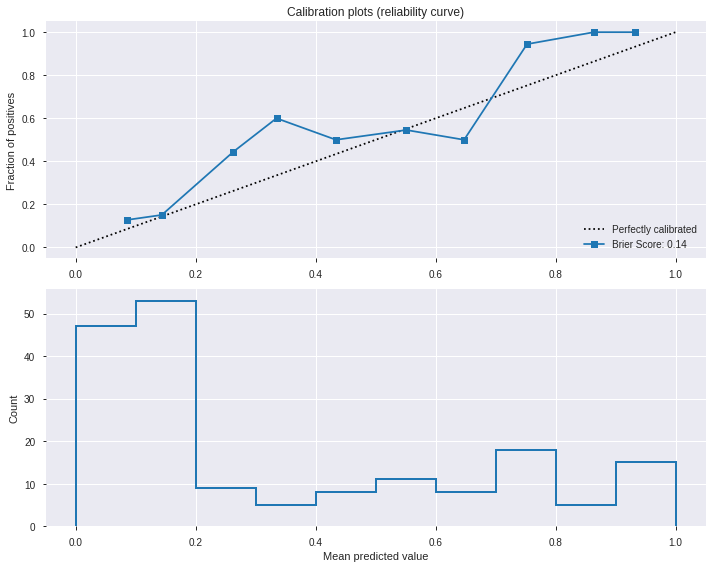

In [48]:
skprofiling.classification_report(y_true, y_pred)